# Project7-Plant Seedlings Image Classification using CNNs in Keras

## 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

### Import necessary libraries.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#import computer vision library
import cv2

#import keras library
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout, Dense, Activation, Flatten

### Load dataset and print shape of data

In [4]:
#load dataset: Images
img_array = np.load('images.npy')

In [5]:
#print shape of data
img_array.shape

(4750, 128, 128, 3)

Comment: There are 4750 images of size 128 by 128 pixels with 3 color channels. 

In [6]:
#checking the pixel values for the first image in the data
img_array[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [7]:
#load dataset: labels
labels_df = pd.read_csv('Labels.csv')
labels_df.shape

(4750, 1)

In [8]:
#print some records
labels_df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [9]:
labels_df.iloc[1][0]

'Small-flowered Cranesbill'

Comment: From the above,we can see the classification for 4750 images 

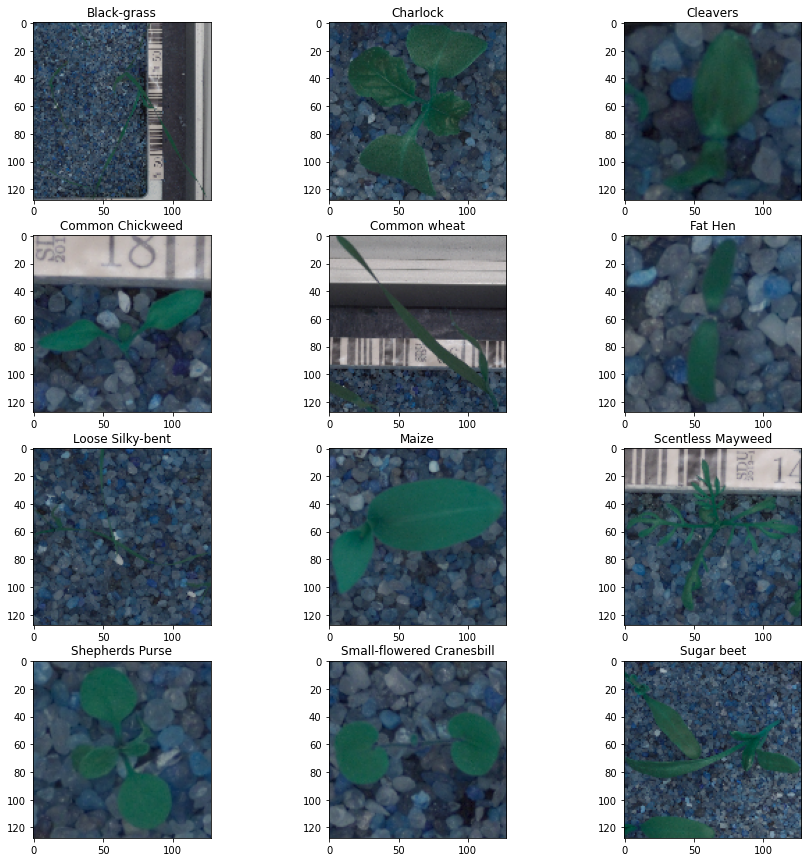

In [10]:
#Visualize one image for each plant seedlings type
f = plt.figure(figsize=(15,15))
for count_val,image_index in enumerate([3833, 2034, 2424,1423, 1202,496, 4096, 3612, 2711, 971, 0, 3227]):
    plt.subplot(4, 3, count_val + 1)
    plt.title(labels_df.iloc[image_index][0])
    plt.imshow(img_array[image_index])

## 2. Data Pre-processing: (15 Marks)
    a. Normalization.
    b. Gaussian Blurring.
    c. Visualize data after pre-processing.

### a. Normalization.

In [11]:
#img_array = img_array.reshape(4750, 128, 128, 3)

In [12]:
print("Max value in X_train:", img_array.max())
print("Min value in X_train:", img_array.min())

Max value in X_train: 255
Min value in X_train: 0


Comment: Max pixel value is 255. So to normalize we will divide by 255. 

In [13]:
#convert the value data type to float
img_array = img_array.astype('float32')
#Normalization
img_array /= 255
#Printing the normalized pixel values for first image
img_array[0]

array([[[0.13725491, 0.20392157, 0.30588236],
        [0.14117648, 0.19215687, 0.29803923],
        [0.12156863, 0.1764706 , 0.27058825],
        ...,
        [0.30588236, 0.37254903, 0.44705883],
        [0.29803923, 0.3647059 , 0.43137255],
        [0.3137255 , 0.37254903, 0.42745098]],

       [[0.12941177, 0.18039216, 0.26666668],
        [0.14509805, 0.19607843, 0.28627452],
        [0.1882353 , 0.25490198, 0.3254902 ],
        ...,
        [0.31764707, 0.3764706 , 0.44313726],
        [0.2901961 , 0.34901962, 0.4117647 ],
        [0.3254902 , 0.37254903, 0.42745098]],

       [[0.13333334, 0.19607843, 0.26666668],
        [0.13725491, 0.20392157, 0.28235295],
        [0.27450982, 0.33333334, 0.39607844],
        ...,
        [0.3254902 , 0.38039216, 0.4392157 ],
        [0.30980393, 0.36862746, 0.42352942],
        [0.30980393, 0.36862746, 0.41960785]],

       ...,

       [[0.13725491, 0.19607843, 0.27058825],
        [0.16470589, 0.22352941, 0.28627452],
        [0.16470589, 0

In [14]:
print("Max value in X_train:", img_array.max())
print("Min value in X_train:", img_array.min())

Max value in X_train: 1.0
Min value in X_train: 0.0


Comment: Pixel values are normalized

### b. Gaussian Blurring.

In [15]:
# We will create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
img_array_blur = np.empty((4750, 128, 128, 3)) 
img_array_blur.shape

(4750, 128, 128, 3)

In [16]:
# Perform Gaussian Blurring with 5X5 filter
# In the following step, we iterate through each row, and perform gaussian blur. 
for idx, plant_img in enumerate(img_array):
    img_array_blur[idx] = cv2.GaussianBlur(plant_img, (5, 5), 0) 

In [17]:
img_array_blur.shape

(4750, 128, 128, 3)

### c. Visualize data after pre-processing.

Original Image(Top row)
Gaussian Blur Image(Bottom row)


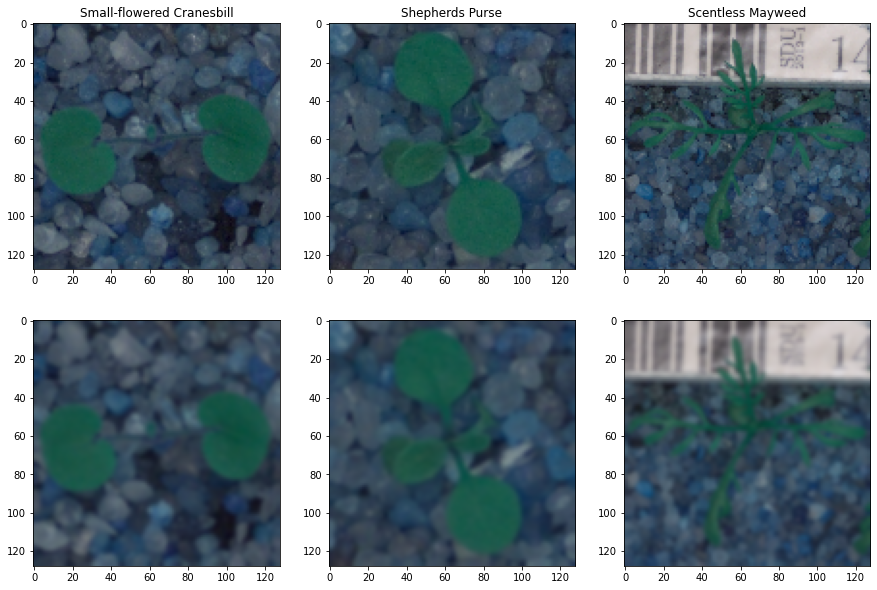

In [18]:
print("Original Image(Top row)")


f = plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.title(labels_df.iloc[0][0])
plt.imshow(img_array[0])
plt.subplot(2, 3, 2)
plt.title(labels_df.iloc[971][0])
plt.imshow(img_array[971])
plt.subplot(2, 3, 3)
plt.title(labels_df.iloc[2711][0])
plt.imshow(img_array[2711])

print("Gaussian Blur Image(Bottom row)")
plt.subplot(2, 3, 4)
plt.imshow(img_array_blur[0])
plt.subplot(2, 3, 5)
plt.imshow(img_array_blur[971])
plt.subplot(2, 3, 6)
plt.imshow(img_array_blur[2711])

Comment: We can see the images in the second row are blurred after performing the gaussian blur

## 3. Make data compatible: (10 Marks)
    a. Convert labels to one-hot-vectors.
    b. Print the label for y_train[0].
    c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
    d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.



### a. Convert labels to one-hot-vectors.

In [19]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [20]:
# we will use lable binarizer to do one-hot encoding
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
label_enc = enc.fit_transform(labels_df)

### b. Print the label for y_train[0].

In [21]:
#Printing the hot coded value for image 501
display(label_enc[500])
#Printing the labels using inverse
display(enc.inverse_transform(label_enc)[500])
#Printing the original label value to confirm the above transformed value is correct
display(labels_df.iloc[[500]])

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

'Fat Hen'

,Label
500,Fat Hen


In [22]:
#checking all the classes
enc.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

Comment: From above, we can confirm the hot encoding is correct

### c. Split the dataset into training, testing, and validation set.

We will create the training and testing data in 70% to 30% ratio. Trainingvalidation dataset will be split into training(50%) and validation(50%).

In [23]:
from sklearn.model_selection import train_test_split
x_trainvalid, x_test, y_trainvalid, y_test = train_test_split(img_array_blur
                                                              , label_enc
                                                              ,test_size=0.3
                                                              ,random_state=8
                                                              ,shuffle = True
                                                              ,stratify = label_enc
                                               )
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_trainvalid
                                                      ,y_trainvalid
                                                      ,test_size=0.5
                                                      ,random_state=8
                                                      ,shuffle = True
                                                      ,stratify = y_trainvalid
                                               )

### d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [24]:
#Checking the data type
print('x_train' , type(x_train))
print('y_train' , type(y_train))
print('x_valid' , type(x_valid))
print('y_valid' , type(y_valid))
print('x_test',type(x_test))
print('y_test',type(y_test))

x_train <class 'numpy.ndarray'>
y_train <class 'numpy.ndarray'>
x_valid <class 'numpy.ndarray'>
y_valid <class 'numpy.ndarray'>
x_test <class 'numpy.ndarray'>
y_test <class 'numpy.ndarray'>


In [25]:
#checking the shape of above arrays
print('x_train' , x_train.shape)
print('y_train' , y_train.shape)
print('x_valid' , x_valid.shape)
print('y_valid' , y_valid.shape)
print('x_test' ,x_test.shape)
print('y_test' ,y_test.shape)

x_train (1662, 128, 128, 3)
y_train (1662, 12)
x_valid (1663, 128, 128, 3)
y_valid (1663, 12)
x_test (1425, 128, 128, 3)
y_test (1425, 12)


Comment: Data is already in compatible shape

## 4. Building CNN: (15 Marks)
    a. Define layers.
    b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

### a. Define layers.

In [26]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))

# Add a MaxPooling Layer of size 3X3 
model.add(MaxPooling2D(pool_size=(3, 3)))

# Apply Dropout with 0.3 probability 
model.add(Dropout(rate=0.3))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=16, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 3X3 
model.add(MaxPooling2D(pool_size=(3, 3)))

# Apply Dropout with 0.3 probability 
model.add(Dropout(rate=0.3))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 12 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

### b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [27]:
# Compile the model. with loss=categorical crossentropy, metrics=accuracy and optimizer=Adam
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)

## 5. Fit and evaluate model and print confusion matrix. (10 Marks)



### Fit the Model

In [28]:
# Fit the model
model.fit( x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid) ,callbacks=[callback])

Epoch 1/20
52/52 [==============================] - 11s 198ms/step - loss: 2.4415 - accuracy: 0.1451 - val_loss: 2.3912 - val_accuracy: 0.2273
Epoch 2/20
52/52 [==============================] - 8s 146ms/step - loss: 2.2692 - accuracy: 0.2517 - val_loss: 2.0627 - val_accuracy: 0.3169
Epoch 3/20
52/52 [==============================] - 8s 153ms/step - loss: 1.7360 - accuracy: 0.3752 - val_loss: 1.7006 - val_accuracy: 0.3957
Epoch 4/20
52/52 [==============================] - 8s 151ms/step - loss: 1.4520 - accuracy: 0.4799 - val_loss: 1.5661 - val_accuracy: 0.4985
Epoch 5/20
52/52 [==============================] - 8s 155ms/step - loss: 1.3713 - accuracy: 0.5297 - val_loss: 1.4049 - val_accuracy: 0.5544
Epoch 6/20
52/52 [==============================] - 8s 158ms/step - loss: 1.1169 - accuracy: 0.6131 - val_loss: 1.3615 - val_accuracy: 0.5683
Epoch 7/20
52/52 [==============================] - 8s 159ms/step - loss: 0.9905 - accuracy: 0.6794 - val_loss: 1.4758 - val_accuracy: 0.5033
Epoch

Comment: Above, We can see the accuracy of the training data with validation. 

### Evaluate the model

In [29]:
model.evaluate(x_test, y_test)

45/45 [==============================] - 1s 24ms/step - loss: 1.2037 - accuracy: 0.6119


[1.2036923170089722, 0.6119298338890076]

Comment: Above, We can see the accuracy of the test data. 

In [30]:
# we will get the prediction data required later
y_pred = model.predict(x_test)

In [31]:
# we will print one of the prediction label
print("Predicted label:", y_pred[0].argmax())
print("Softmax Outputs:", y_pred[0])
print(y_pred[0].sum())

Predicted label: 3
Softmax Outputs: [8.8517183e-08 3.4368550e-05 5.6118111e-08 9.1136628e-01 1.9220161e-06
 5.0607341e-06 2.4207204e-05 7.1138218e-02 1.3123536e-02 3.6975653e-03
 1.1651205e-04 4.9216894e-04]
0.99999994


Comment: Above we can see the prediction probabilities for each of the 12 seedling classes

In [32]:
# we will get the prediction classes for all the predicted data.
y_pred_class = np.argmax(model.predict(x_test), axis=-1)
y_pred_class

array([ 3,  8, 10, ..., 11,  9,  7])

In [33]:
# we will get the original image classes so that we can compare with predicted classes.
y_test_class = np.argmax(y_test, axis=-1)
y_test_class

array([ 3, 11, 10, ...,  5,  8,  8])

### Print Confusion Matrix

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

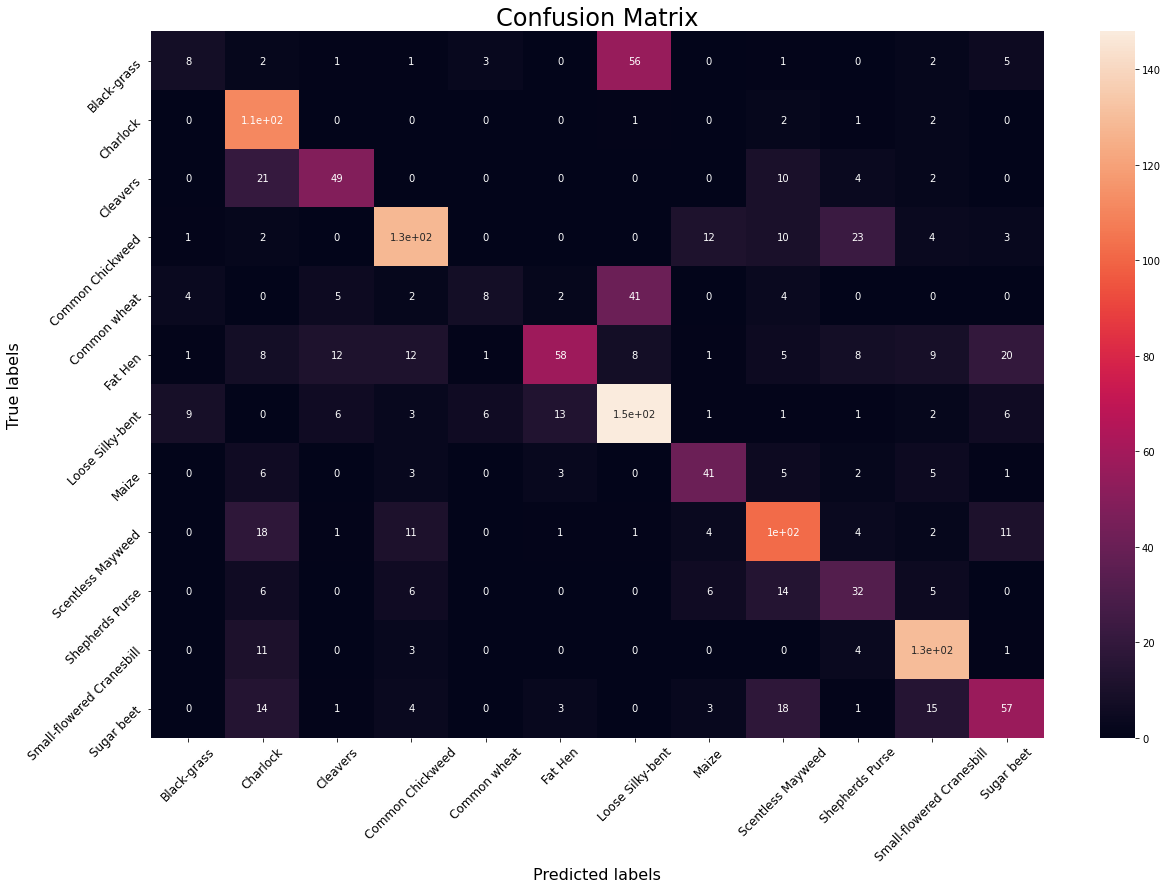

In [35]:
import seaborn as sns
cm = confusion_matrix(y_test_class, y_pred_class)
#display(cm)
plt.subplots(figsize=(20, 13))
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=16);ax.set_ylabel('True labels', fontsize=16); 
ax.set_title('Confusion Matrix', fontsize=24); 
ax.xaxis.set_ticklabels(enc.classes_, fontsize=12, rotation=45); ax.yaxis.set_ticklabels(enc.classes_, fontsize=12, rotation=45);

In [36]:
print(classification_report(y_test_class, y_pred_class, target_names=enc.classes_))
#support is the number of occurrences of each class in y_true(y_test_class)

                           precision    recall  f1-score   support

              Black-grass       0.35      0.10      0.16        79
                 Charlock       0.56      0.95      0.70       117
                 Cleavers       0.65      0.57      0.61        86
         Common Chickweed       0.74      0.70      0.72       183
             Common wheat       0.44      0.12      0.19        66
                  Fat Hen       0.72      0.41      0.52       143
         Loose Silky-bent       0.58      0.76      0.66       196
                    Maize       0.60      0.62      0.61        66
        Scentless Mayweed       0.59      0.66      0.62       155
          Shepherds Purse       0.40      0.46      0.43        69
Small-flowered Cranesbill       0.73      0.87      0.80       149
               Sugar beet       0.55      0.49      0.52       116

                 accuracy                           0.61      1425
                macro avg       0.58      0.56      0.54    

Comment: Above we can see the metrics for each plant class. The highest F1 score is for class "Small-flowered Cranesbill". The lowest F1 score is for "Black-grass".

## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

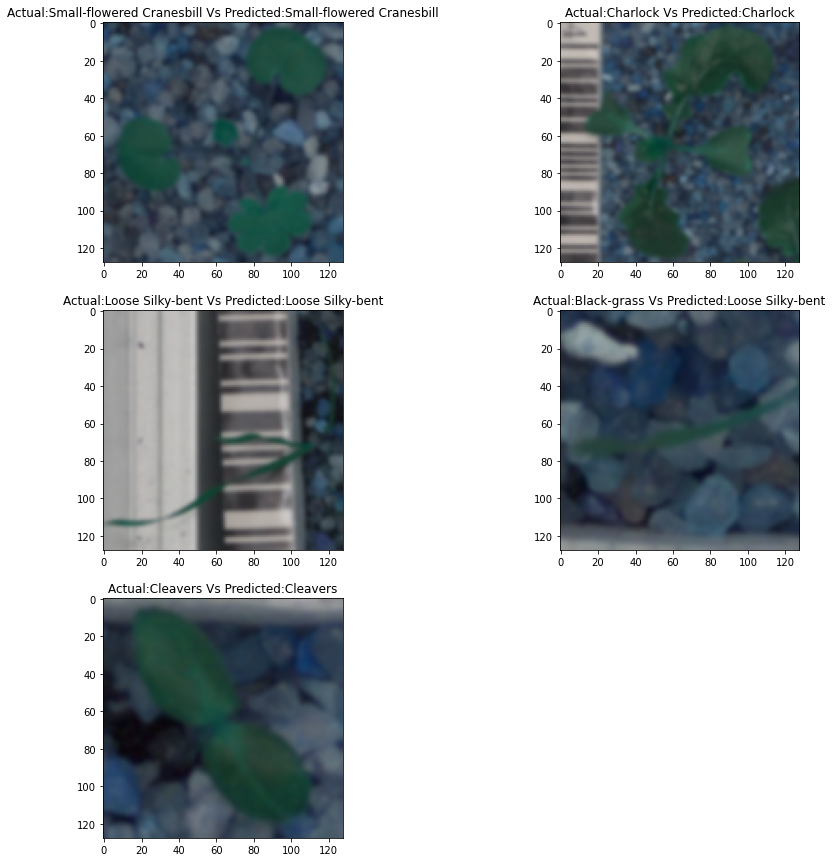

In [37]:
#Visualize images in x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].
f = plt.figure(figsize=(15,15))
for count_val,image_index in enumerate([2,3,33,36,59]):
    #print("count_val:",count_val)
    #print("image_index:",image_index)
    plt.subplot(3, 2, count_val + 1)
    #actual_cls = y_test[image_index].argmax()
    Actual_Label = enc.classes_[y_test_class[image_index]] #enc.classes_[actual_cls]
    #pred_cls = y_pred[image_index].argmax()
    Predicted_Label = enc.classes_[y_pred_class[image_index]] #enc.classes_[pred_cls]
    plt.title("Actual:"+Actual_Label+" Vs Predicted:"+Predicted_Label)
    plt.imshow(x_test[image_index]) 

Comment: The model predicted 3 of above pictures correctly but the other 2 predictions are wrong.

## Hypertuning

In [52]:
#Import keras library
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(n_hidden_layer=1, n_neurons=8, n_categories=12, n_learning_rate=0.01, n_optimizer='Adam', n_activation='relu'):
    
    # create model
    model = Sequential()
    
    # Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
    model.add(Conv2D(filters=32, kernel_size=3, activation=n_activation, input_shape=(128, 128, 3)))

    # Add a MaxPooling Layer of size 3X3 
    model.add(MaxPooling2D(pool_size=(3, 3)))

    # Apply Dropout with 0.3 probability 
    model.add(Dropout(rate=0.3))

    # Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
    model.add(Conv2D(filters=16, kernel_size=3, activation=n_activation))

    # Add a MaxPooling Layer of size 3X3 
    model.add(MaxPooling2D(pool_size=(3, 3)))

    # Apply Dropout with 0.3 probability 
    model.add(Dropout(rate=0.3))

    # Flatten the layer
    model.add(Flatten())

    
    temp=n_neurons
    i=0
    
    #---------------------The number of neurons in layer n+1 is 2/3 * Number of neurons in layer n---------------
    for layer in range(n_hidden_layer):
        
        model.add(Dense(n_neurons, activation=n_activation))
        n_neurons=int(round(n_neurons*2/3))   
    
    model.add(Dense(n_categories, activation = 'softmax'))
    
    # Compile model
    
    if n_optimizer == 'Adam':   
        optimizer=keras.optimizers.Adam(lr=n_learning_rate)
    elif n_optimizer == 'Adagrad':
        optimizer=keras.optimizers.Adagrad(lr=n_learning_rate)
    elif n_optimizer == 'Adadelta':
        optimizer=keras.optimizers.Adadelta(lr=n_learning_rate)
    elif n_optimizer == 'RMSprop':
        optimizer=keras.optimizers.RMSprop(lr=n_learning_rate)

    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [53]:
from sklearn.base import clone
 
keras_class = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_model,nb_epoch = 20,
                            batch_size=32)
clone(keras_class)

In [65]:
len(x_train)

1662

In [66]:
len(y_train)

1662

In [101]:
y_train[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
y_train_act_cls = pd.DataFrame(columns='Label')
for i in range(len(y_train)):
    print(y_train[i].argmax())
    y_train_act_cls.append(pd.DataFrame(y_train[i].argmax()))
    

TypeError: Index(...) must be called with a collection of some kind, 'Label' was passed

In [105]:
y_train_act_cls

1

In [106]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_distribs = {
    "n_hidden_layer": [1],
    "n_neurons": [128],
    "n_categories": [12],
    "n_learning_rate": [0.01],
     "n_optimizer":['Adam'],#,'Adagrad','Adadelta','RMSprop'
    "n_activation":['relu']#,'tanh'
}

rnd_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=2, cv=3, scoring='accuracy')
rnd_search_cv.fit(x_train, y_train, epochs=5)
#Grid_search_cv = GridSearchCV(keras_class, param_distribs, cv=3)
#Grid_search_cv.fit(X_train, y_train.values, epochs=5)

Epoch 1/5
35/35 [==============================] - 5s 133ms/step - loss: 2.8351 - accuracy: 0.1140
Epoch 2/5
35/35 [==============================] - 4s 119ms/step - loss: 2.4264 - accuracy: 0.1407
Epoch 3/5
35/35 [==============================] - 4s 115ms/step - loss: 2.4131 - accuracy: 0.1568
Epoch 4/5
35/35 [==============================] - 4s 122ms/step - loss: 2.4094 - accuracy: 0.1190
Epoch 5/5
35/35 [==============================] - 4s 122ms/step - loss: 2.3978 - accuracy: 0.1541


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [ ]:
rnd_search_cv.best_params_

In [ ]:
#Lets print the best training data accuracy score
rnd_search_cv.best_score_

In [ ]:
# we will get the classes for predicting metrics.
Y_pred_class = rnd_search_cv.predict(X_test)

In [ ]:
#print('Accuracy: '+ str(rnd_search_cv.evaluate(X_test,y_test.values)[1]))

print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class)))

print('F-score: ' + str(f1_score(y_test.values,Y_pred_class)))